In [41]:
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import zipfile

#### Se não der certo em algum momento do código, pode ser que seja a biblioteca TENSORFLoW.
    - Podemos refaazer com o comando 
        !pip inatall tensorflow == 2.6.0

In [42]:
tf.__version__

'2.12.0'

### Extraindo os arquivos zip das imagens.
    - Só precisa ser executado uma única vez.

In [43]:
#path = 'C:/Users/55859/Desktop/Estudos/Visão Computacional/Reconhecimento Facial/Rede Neural/Arquivos/homer_bart_1.zip'
#zip_object = zipfile.ZipFile(file = path, mode= 'r')
#zip_object.extractall('./')
#zip_object.close()

In [44]:
#path = 'C:/Users/55859/Desktop/Estudos/Visão Computacional/Reconhecimento Facial/Rede Neural/Arquivos/homer_bart_2.zip'
#zip_object = zipfile.ZipFile(file = path, mode= 'r')
#zip_object.extractall('./')
#zip_object.close()

In [45]:
path = './Arquivos/homer_bart_1/'
arquivos = [os.path.join(path, p) for p in sorted(os.listdir(path))]
for p in arquivos:
    print(p)


./Arquivos/homer_bart_1/.DS_Store
./Arquivos/homer_bart_1/bart1.bmp
./Arquivos/homer_bart_1/bart10.bmp
./Arquivos/homer_bart_1/bart100.bmp
./Arquivos/homer_bart_1/bart101.bmp
./Arquivos/homer_bart_1/bart102.bmp
./Arquivos/homer_bart_1/bart103.bmp
./Arquivos/homer_bart_1/bart104.bmp
./Arquivos/homer_bart_1/bart105.bmp
./Arquivos/homer_bart_1/bart106.bmp
./Arquivos/homer_bart_1/bart108.bmp
./Arquivos/homer_bart_1/bart109.bmp
./Arquivos/homer_bart_1/bart11.bmp
./Arquivos/homer_bart_1/bart110.bmp
./Arquivos/homer_bart_1/bart111.bmp
./Arquivos/homer_bart_1/bart112.bmp
./Arquivos/homer_bart_1/bart113.bmp
./Arquivos/homer_bart_1/bart114.bmp
./Arquivos/homer_bart_1/bart115.bmp
./Arquivos/homer_bart_1/bart116.bmp
./Arquivos/homer_bart_1/bart117.bmp
./Arquivos/homer_bart_1/bart118.bmp
./Arquivos/homer_bart_1/bart119.bmp
./Arquivos/homer_bart_1/bart12.bmp
./Arquivos/homer_bart_1/bart120.bmp
./Arquivos/homer_bart_1/bart121.bmp
./Arquivos/homer_bart_1/bart122.bmp
./Arquivos/homer_bart_1/bart123.bmp

#### OBS: todas as imagens precisão ter o mesmo tamanho de pixel para podermos operar.
    - Para isso precisamos padronozar os tamanhos das imagens.
    - Colocando altura e largura com 128, mas poderia ser 2 elevado a n. 
        Como exemplo 512, com a resolução maior, a precisão da CNN aumenta.
        Mas para estudo, vamos colocar 128.

In [46]:
altura, largura = 256, 256
altura * largura
# Este valor é por imagem.

65536

### O código abaixo não está funcionando.

In [47]:
#for imagens_caminho in arquivos:
    #print(imagens_caminho) # Somente para visualizar.
#    try:
 #       imagem = cv2.imread(imagens_caminho) # 1 essa primeira parte é porque tem uma arquivo qu
 #       (h, w) = imagem.sahpe[:2]
    
  #  except:
   #     continue
    #imagem = cv2.resize(imagem, (altura, largura))
    #imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    #imagem = np.array(imagem, 'uint8')
    #print(imagem)
    #imagens.append(imagem)

### Explicação do código de cima.
    - 1 essa primeira parte é porque tem uma arquivo que não é imagem './Arquivos/homer_bart_1/.DS_Store'
    Então essa parte do try e excep faz o tratamento de excessão.

In [48]:
image = []
classes = []
for i_caminho in arquivos:
    try:
        img = cv2.imread(i_caminho)
        (h, w) = img.shape[:2]
    except:
        continue
    img = cv2.resize(img, (altura, largura))# Passando os paarâmetros novos de alt, larg.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Passando a imagem para escala de cinza.
    # Transformando em um vetero com o comando revel()
    img = img.ravel()
    image.append(img)
    nome_image = os.path.basename(os.path.normpath(i_caminho))
    #print(nome_image) # Para mostrar o nome.
    if nome_image.startswith('b'):
        classe = 0
    else:  
        classe = 1
    classes.append(classe) 


In [49]:
image[0], classes[0]

(array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0)

#### OBS: Quando estamos trabalhando com esses modelos.
    - Separamos em variável que já sabemos que são as classes, e os valores que vamos se basear.

In [50]:
X = np.asarray(image)
Y = np.asarray(classes)

#### OBS:
##### Temos 269 imagens e cada uma tem 65536 pixels.

In [51]:
X.shape, Y.shape

((269, 65536), (269,))

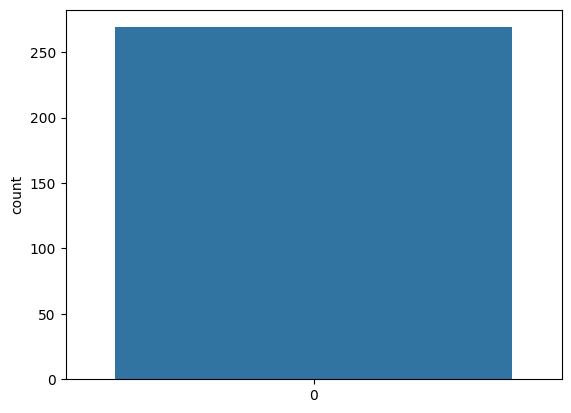

In [52]:
sns.countplot(Y);
# os ponto e virgula serve para não mostrar o aviso chato do seaborn

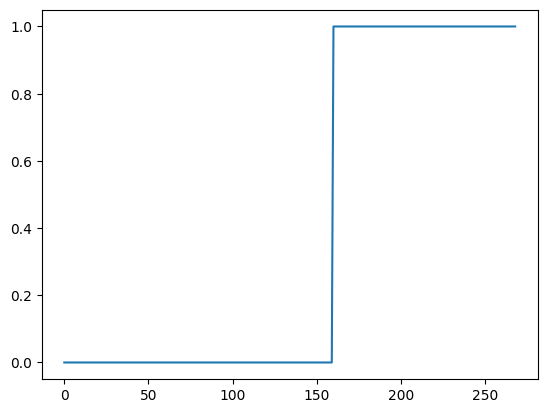

In [38]:
plt.plot(Y);

In [39]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([160, 109], dtype=int64))